In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
import numpy as np
import pandas as pd

In [7]:
dataset = pd.read_csv('combined_data.csv')

In [8]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [9]:
import tensorflow_datasets as tfds

In [10]:
vocab_size = 1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    sentences, vocab_size, max_subword_length=5
)

In [11]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [12]:
for i in encoded:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [14]:
for i , sequence in enumerate(sentences):
    sentences[i]=tokenizer.encode(sequence)

In [15]:
sentences[0]

[736,
 168,
 775,
 7,
 193,
 417,
 17,
 94,
 6,
 600,
 438,
 775,
 14,
 19,
 141,
 19,
 1,
 828,
 826,
 775,
 99,
 445,
 4,
 174,
 361,
 5,
 79,
 227,
 139,
 789]

In [17]:
max_length = 50
trunc_type='post'
padding_type='post'



sentences_padded = pad_sequences(sentences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [18]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 30
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels_final))

Train on 1593 samples, validate on 399 samples
Epoch 1/30
1593/1593 [==============================] - 1s 694us/sample - loss: 0.6904 - accuracy: 0.5242 - val_loss: 0.6993 - val_accuracy: 0.4211
Epoch 2/30
1593/1593 [==============================] - 0s 67us/sample - loss: 0.6847 - accuracy: 0.5461 - val_loss: 0.6951 - val_accuracy: 0.4612
Epoch 3/30
1593/1593 [==============================] - 0s 81us/sample - loss: 0.6752 - accuracy: 0.6058 - val_loss: 0.6895 - val_accuracy: 0.5038
Epoch 4/30
1593/1593 [==============================] - 0s 92us/sample - loss: 0.6613 - accuracy: 0.6284 - val_loss: 0.6758 - val_accuracy: 0.5514
Epoch 5/30
1593/1593 [==============================] - 0s 57us/sample - loss: 0.6412 - accuracy: 0.6805 - val_loss: 0.6555 - val_accuracy: 0.6692
Epoch 6/30
1593/1593 [==============================] - 0s 111us/sample - loss: 0.6139 - accuracy: 0.7615 - val_loss: 0.6441 - val_accuracy: 0.6266
Epoch 7/30
1593/1593 [==============================] - 0s 69us/sampl

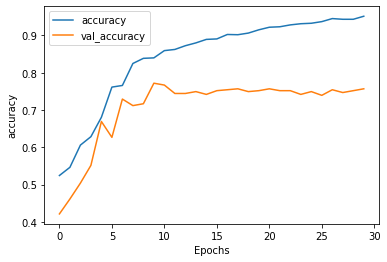

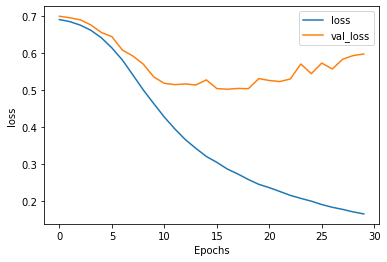

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")